# The MAGIC experiment
- Data source: https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope

## Attribute Information:

1. fLength: continuous # major axis of ellipse [mm] 
2. fWidth: continuous # minor axis of ellipse [mm] 
3. fSize: continuous # 10-log of sum of content of all pixels [in #phot] 
4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio] 
5. fConc1: continuous # ratio of highest pixel over fSize [ratio] 
6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm] 
7. fM3Long: continuous # 3rd root of third moment along major axis [mm] 
8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm] 
9. fAlpha: continuous # angle of major axis with vector to origin [deg] 
10. fDist: continuous # distance from origin to center of ellipse [mm] 
11. class: g,h # gamma (signal), hadron (background) 

## Classes
- g = gamma (signal): 12332 
- h = hadron (background): 6688 

# Load data etc

In [3]:
%pylab inline
import pandas as pd
pd.options.display.max_rows = 300

columns = ['fLength',
        'fWidth',
        'fSize',
        'fConc',
        'fConc1',
        'fAsym',
        'fM3Long',
        'fM3Trans',
        'fAlpha',
        'fDist',
        'class']

data = pd.read_csv('../data/MAGIC/magic04.data')
data.columns = columns


Populating the interactive namespace from numpy and matplotlib


# Exercise: Data Understanding
We want to know:
- how our data looks
- which columns we have
- how the classes are distributed

In [4]:
data.sample(10)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
12004,25.9538,12.1946,2.4624,0.4621,0.2534,-0.3813,17.3215,-7.5821,39.3150,223.4950,g
3538,28.7649,8.2457,2.2553,0.6056,0.3472,30.6864,22.0444,-6.6302,11.0535,135.3960,g
6270,18.0731,11.5841,2.4125,0.5803,0.4313,-0.5062,6.9524,-11.5926,9.6089,256.9110,g
13257,109.6728,25.1690,3.2987,0.3178,0.1794,-66.8440,-36.3632,18.4476,1.2185,346.0835,h
15770,26.6670,18.8955,2.5700,0.4011,0.2005,-7.8127,-21.2795,-15.7493,85.6473,111.3350,h
8414,15.1513,12.1682,2.5092,0.6594,0.3483,-0.6190,1.8562,-4.9772,75.4150,201.1220,g
12005,22.4007,12.7727,2.2529,0.5866,0.3436,13.7464,13.6608,9.0781,1.4510,163.6770,g
11258,64.9481,35.2075,3.0757,0.1957,0.1004,-66.3145,41.6654,25.1270,2.9623,315.0200,g
301,43.9615,20.2437,3.1313,0.2092,0.1090,-27.2263,-20.6041,14.3218,6.8460,189.6160,g
236,45.8732,11.2837,2.5653,0.3837,0.2190,43.4461,-19.3437,2.9659,4.6366,192.5250,g


## Class Distribution

In [11]:
data['class'].value_counts()

g    12331
h     6688
Name: class, dtype: int64

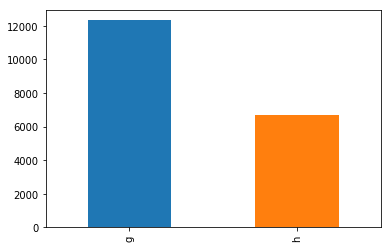

In [12]:
data['class'].value_counts().plot.bar();

In [13]:
data.shape

(19019, 11)

In [14]:
data.describe(include='all')

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
count,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12331
mean,53.251440,22.181291,2.825026,0.380326,0.214658,-4.333429,10.544942,0.250170,27.645052,193.823912,NaN
std,42.365598,18.346484,0.472609,0.182818,0.110514,59.207163,51.001391,20.827896,26.104151,74.729344,NaN
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600,NaN
25%,24.336000,11.863700,2.477100,0.235800,0.128450,-20.588300,-12.845050,-10.849750,5.546950,142.499000,NaN
50%,37.149000,17.140600,2.739600,0.354100,0.196500,4.011900,15.309400,0.689800,17.677000,191.856900,NaN
75%,70.126850,24.739950,3.101600,0.503700,0.285250,24.060350,35.844100,10.947050,45.884100,240.564550,NaN


fLength


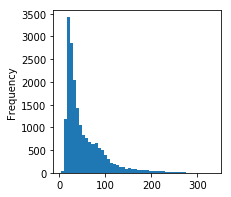

fWidth


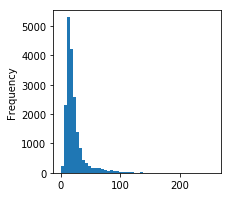

fSize


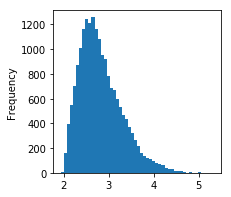

fConc


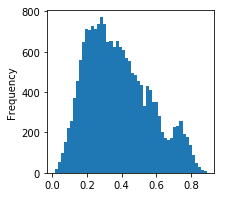

fConc1


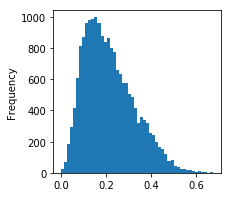

fAsym


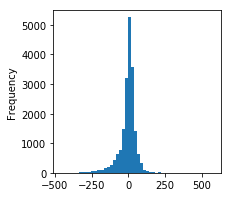

fM3Long


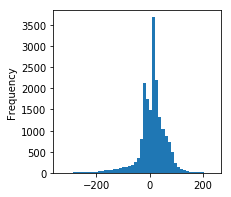

fM3Trans


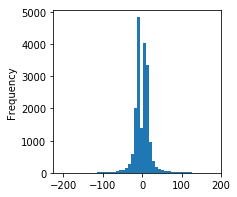

fAlpha


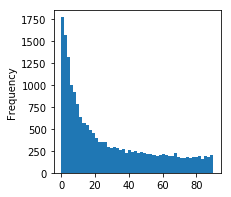

fDist


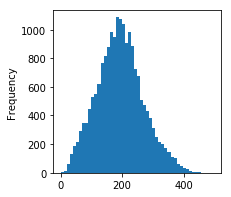

In [15]:
for column in data.columns:
    if column != 'class':
        print(column)
        data[column].plot.hist(bins=50, figsize=(3,3))
        plt.show();

CPU times: user 8.38 s, sys: 176 ms, total: 8.55 s
Wall time: 8.55 s


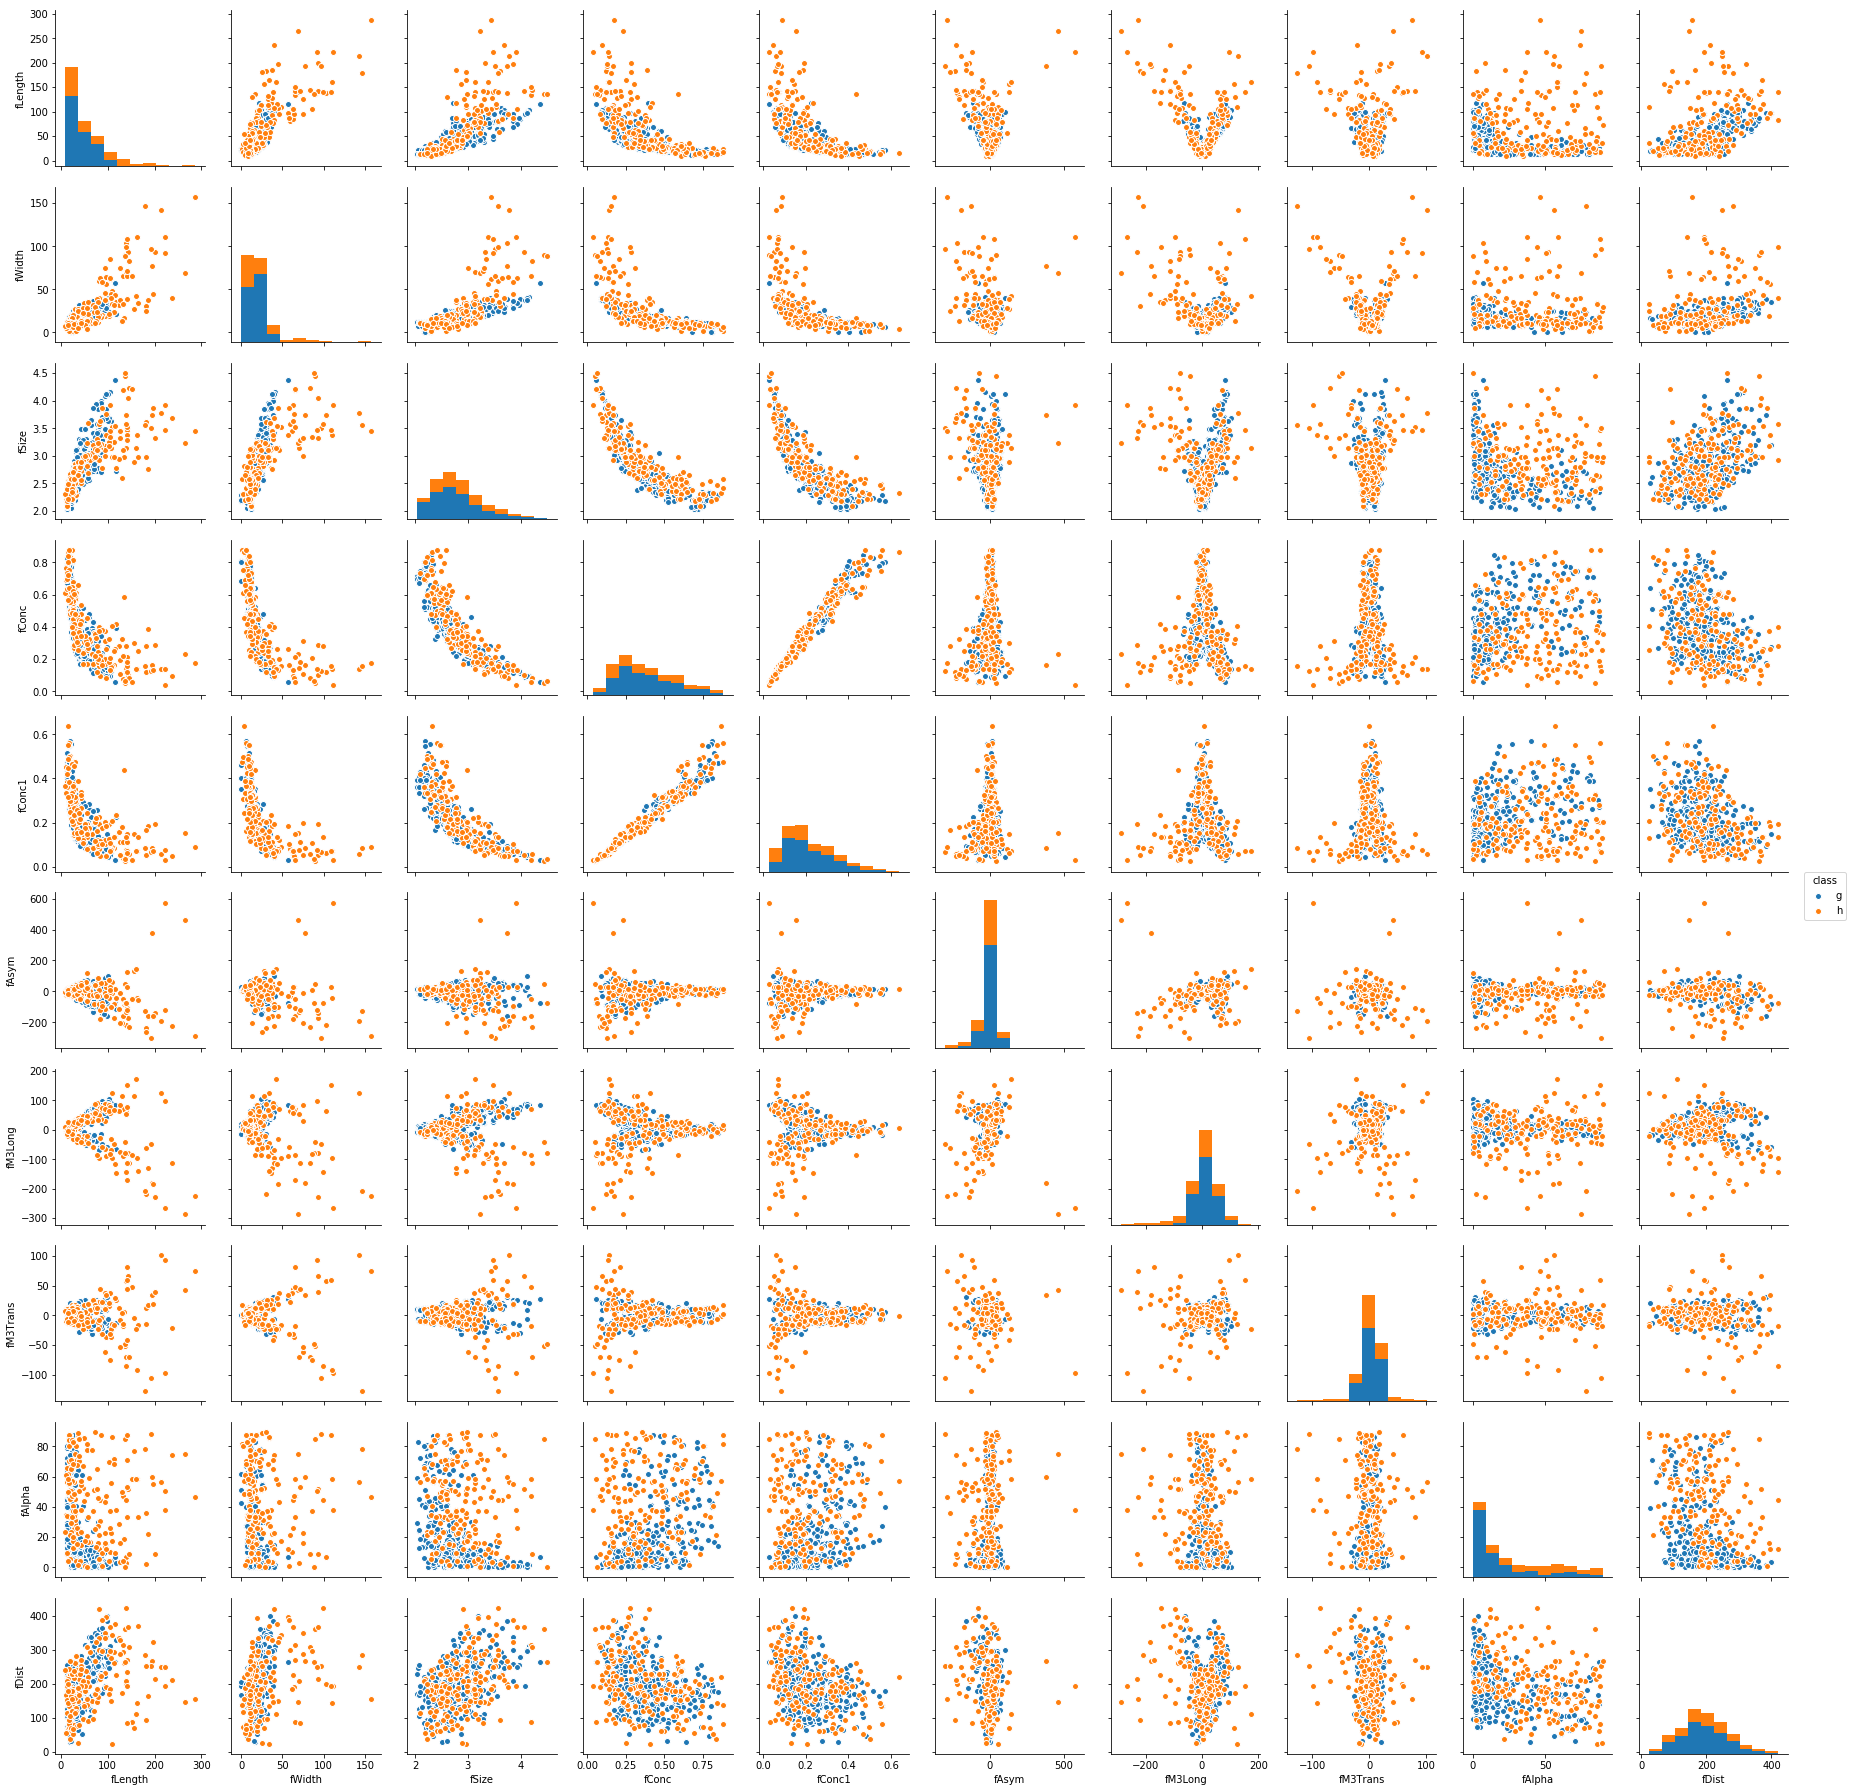

In [18]:
%%time
import seaborn as sns
sns.pairplot(data.sample(500), hue='class');

# Data Preparation

Some algorithm implementations do not cope well with nominal labels -- they prefer zeros and ones. Also, we will use sklearn, which requires the data and the label in different variables.

In [19]:
# split data into attributes...
X = data.drop('class', axis=1)

# ... and label:
y = data['class']

In [20]:
# convert g and h to 1 and 0:
y = [1 if val == 'g' else 0 for val in y]

In [21]:
X.head(5)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098


In [22]:
y[:5]

[1, 1, 1, 1, 1]

*Note that y is a list now, while X is a pandas DataFrame!*

# Modelling
Let's create a first model. Domain experts tell us that the Random Forest has proven to be quite successful for MAGIC data.

## scikit-learn
We are using scikit-learn, a standard library for machine learning in Python. It describes itself like this:

*Machine Learning in Python*

- Simple and efficient tools for data mining and data analysis
- Accessible to everybody, and reusable in various contexts
- Built on NumPy, SciPy, and matplotlib
- Open source, commercially usable - BSD license

scikit-learn offers a big selection of machine learning algorithms, as well as validation methods and tools to optimize hyper parameters and conduct feature selection.

## Using scikit-learn

scikit-learn can be installed by using pip to install the `sklearn` package. Most algorithms are located in subpackages. For example, decision trees, random forest etc are in the `tree` submodule:

In [23]:
from sklearn.tree import DecisionTreeClassifier

Every classifier (and every regressor) has 
- a `fit(X, y)` function to fit the model to the data
- a `predict(X)` function that delivers an array of predictions

The `fit(X, y)` function expects a matrix with all examples as rows and the attributes as columns, as well as a vector that contains the label.

The `predict(X)` function only expects the attribute matrix.

Mostly, passing a pandas dataframe as `X` works fine, but sometimes this causes problems and you need to supply a numpy matrix. You can get a numpy matrix from a dataframe via the `values` attribute: `matrix = df.values`

## Fitting the model

Now we can instantiate a model object and fit it:

In [24]:
# create classifier object: decision tree
clf = DecisionTreeClassifier(max_depth=5)

# Every sklearn classifier has a fit() function:
clf.fit(X, y)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Getting Predictions

To get predictions we call the `predict()` function with a feature matrix. The output is a vector of the same length as the matrix. It contains the prediction for each row of the feature matrix.

In [25]:
preds = clf.predict(X)

In [26]:
preds.shape

(19019,)

In [27]:
preds[:5]

array([1, 0, 1, 1, 1])

## Validation
Great, we have a model and can use it to create predictions. But are the predictions correct?

We have seen that we need a separate test set. But how do we get that?

--> Split the data!

This can be done with the `train_test_split()` method of the `model_selection` submodule.

In [28]:
from sklearn.model_selection import train_test_split

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape, len(y_train))
print(X_test.shape, len(y_test))

((12742, 10), 12742)
((6277, 10), 6277)


Now we repeat the steps just as before, but this time we fit the model on the training data and generate predictions for the test data:

In [29]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred[:5])

[0 1 1 0 0]


### Computing the accuracy

The accuracy is the percentage of correctly classified examples. Like all performance measures, it is implemented in the [`metrics` submodule](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics):

In [30]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.8247570495459614


This is the fraction of correctly classified examples.

### Interpretation of the accuracy
Above value is the accuracy, i.e., the fraction of correctly classified examples.

We aim at a high accuracy (good predictions!)

Highest accuracy is 1, lowest is 0. Is our result good?

Hard to tell -- depends on the class distribution
-> compare to default classifier

In [31]:
from sklearn.dummy import DummyClassifier
# DummyClassifier always predicts majority class (= most frequent class)
dummy = DummyClassifier(strategy='most_frequent')

# used in same way as the decision tree!
dummy.fit(X_train, y_train)
dy_pred = dummy.predict(X_test)
print(metrics.accuracy_score(y_test, dy_pred))

0.6483989166799426


*So the accuracy of the DecisionTreeClassifier is better than the DummyClassifier -- that's good!*

### The confusion matrix
Ok, the tree model performs way better than default model.

Is there a performance measure that is not dependent on the class distribution? Something where a certain value directly is meaningful?

Please meet: the confusion matrix.

In [32]:
clf.fit(X_train, y_train)
cm = metrics.confusion_matrix(y_test, clf.predict(X_test))
print(cm)

[[1492  715]
 [ 385 3685]]


You can easily pretty-print the confusion matrix by converting it to a DataFrame with proper column and row labels. Use the following function as a helper:

In [33]:
def cm2df(cm):
    """ Converts a confusion matrix as produced by `metrics.confusion_matrix()` to a pandas DataFrame.
    :param cm: the confusion matrix
    :return: the confusion matrix as DataFrame
    """
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['predicted h', 'predicted g']
    cm_df.index = ['true h', 'true g']
    return cm_df

In [34]:
cm_df = cm2df(cm)
cm_df

,predicted h,predicted g
true h,1492,715
true g,385,3685


If you have many classes, often a heat map is a nice viusalization:

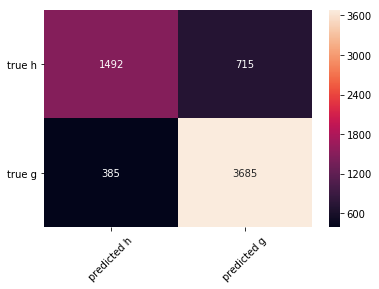

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# plot heatmap
ax = sns.heatmap(cm_df, annot=True, fmt='d')

# rotate the axis labels
plt.xticks(rotation=45)
plt.yticks(rotation=0);

### Exercise
- How to get accuracy from the confusion matrix?

### Precision and Recall
- *Recall of class X*: fraction of examples from class X that are classified correctly. How many percent of class X do you find?
- *Precision of a class X*: fraction of correctly classified examples if prediction is X. "If you predict X, how certain are you that it really is an X"

### Exercise
- how to calculate recall from confusion matrix?
- how to calculate precision from confusion matrix?
- is the recall dependent on the class distribution? Is the precision?
- calculate precision and recall for gamma particles (class 1) from the confusion matrix

In [26]:
print(cm_df)

# your code here...


        predicted h  predicted g
true h         1492          715
true g          385         3685


Instead of calculating things manually from the confusion matrix, there are of course also `sklearn` functions. Use them to control your results.

In [36]:
recall_g = metrics.recall_score(y_test, y_pred, pos_label=1)
recall_h = metrics.recall_score(y_test, y_pred, pos_label=0)
print("Recall g: %.2f"% recall_g)
print("Recall h: %.2f"% recall_h)

Recall g: 0.91
Recall h: 0.68


### Classification Report

Another useful function is the classification report, also to be found in the `metrics` module:

In [28]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.68      0.73      2207
          1       0.84      0.91      0.87      4070

avg / total       0.82      0.82      0.82      6277



### Cohen's kappa

*Cohen's kappa* can be interpreted as an accuracy score normalized by the class distribution. So it can be interpreted independent of the class distribution.

*Implementation*: [`sklearn.metrics.cohen_kappa_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html#sklearn.metrics.cohen_kappa_score)

*Definition:* `(my_acc - def_acc) / (1 - def_acc)`

*Interpretation:*
- 1: perfect predictor
- 0: default predictor (always predict majority class)
- -1: predictor is always wrong (hint: invert predictions!)

### More performance measures
http://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/


## Exercise
From the data description: "classifying a background event (0) as signal (1) is worse than classifying a signal event as background"
1. looking at the recall values above, does our model consider this information?
1. also calculate the precision of both classes. This link will be helpful: [sklearn.metrics](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)
1. Train and valiate a random forest instead of a decision tree. See [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
1. How does the number of trees affect the classification performance?

In [63]:
# you will need the variables X_train, y_train, X_test, y_test

# your code here...

from sklearn.ensemble import RandomForestClassifier

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

df = pd.DataFrame(columns={'accuracy'})

for i in range(1,100):

    clf = RandomForestClassifier(max_depth=i)
    clf.fit(X_train,y_train)

    y_pred = clf.predict(X_test)

    accuracy = metrics.accuracy_score(y_test, y_pred)

    df.append({'accuracy':accuracy},ignore_index=True)


In [65]:
df

,accuracy


In [66]:
#
# Solution below
#
#
#
#
# 
#             ###
#             ###
#             ###
#           #######
#            #####
#             ###
#              #
# 
#
#                   ###
#                   ###
#                   ###
#                 #######
#                  #####
#                   ###
#                    #
# 
#
#             ###
#             ###
#             ###
#           #######
#            #####
#             ###
#              #
# 
#
#                   ###
#                   ###
#                   ###
#                 #######
#                  #####
#                   ###
#                    #
# 
#
#             ###
#             ###
#             ###
#           #######
#            #####
#             ###
#              #
# 
#

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# ... and calculate performance:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, pos_label=1)
recall = metrics.recall_score(y_test, y_pred, pos_label=1)

print(accuracy, precision, recall)
print()
print(metrics.classification_report(y_test, y_pred))

(0.8754181934044926, 0.8816155988857939, 0.9331695331695332)
()
             precision    recall  f1-score   support

          0       0.86      0.77      0.81      2207
          1       0.88      0.93      0.91      4070

avg / total       0.87      0.88      0.87      6277



## ROC Analysis
- Most learners can return probabilities or likelihoods instead of binary predictions.
- Normally, class with highest probability is predicted (50% threshold in case of binary classification problem)
- Sometimes we want to change this threshold: e.g., when making errors in one direction is more expensive than in the other direction
- But: there's a tradeoff: by changing decision threshold, you can increase recall of one class, but decrease recall of other class

- Visualization: 
  - sort predictions by probability.
  - for each example from top to bottom:
    - if prediction is correct: go one step up
    - otherwise: go one step right
- This is called a *ROC Plot* (Receiver Operating Characteristics)
- see also: http://blog.yhat.com/posts/roc-curves.html

### Output confidences instead of actual classes:

In [67]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# predict class probabilities instead of binary classes
confidences = clf.predict_proba(X_test)

# Confidences is a list of tuples of (confidence('g'), confidence('h'))
confidences

array([[0.88, 0.12],
       [0.02, 0.98],
       [0.12, 0.88],
       ...,
       [0.9 , 0.1 ],
       [0.65, 0.35],
       [0.34, 0.66]])

Put confidences into a DataFrame and add correct label:

In [68]:
confidences_df = pd.DataFrame(confidences, columns=['conf_h', 'conf_g'])
confidences_df['true_label'] = y_test
confidences_df.sample(200).sort_values('conf_g')

,conf_h,conf_g,true_label
3393,1.00,0.00,0
6186,1.00,0.00,0
3434,1.00,0.00,0
2695,1.00,0.00,0
337,1.00,0.00,0
2594,1.00,0.00,0
5907,1.00,0.00,0
4486,1.00,0.00,0
6273,1.00,0.00,0
500,0.99,0.01,0


### The ROC Plot

Now, we loop over all unique confidence values and use each as decision threshold:

```for c in confidences:
  for example in examples:
    if conf_g(example) > c: 
      prediction(example) := g
    else 
      prediction(example) := h
    compute tpr(c), fpr(c) of predictions
```

Then plot `tpr` vs `fpr`. This results in the ROC-Plot.
In sklearn the above algorithm is implemented in the function `metrics.roc_curve`.

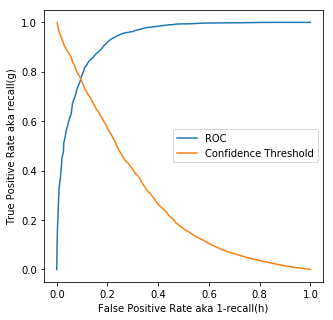

In [74]:
# Extract confidences as lists:
conf_h, conf_g = zip(*confidences)  # zip(confidences[0], confidences[1], ...)

# Use roc_curve() to extract false positive rate, true positive rate and the corresponding thresholds:
fpr, tpr, thresholds = metrics.roc_curve(y_test, conf_g, pos_label=1)
plt.figure(figsize=[5,5])
plt.plot(fpr, tpr)
plt.plot(fpr[1:], thresholds[1:])  # thresholds[0] == 2.0, skip it for plotting
plt.xlabel('False Positive Rate aka 1-recall(h)')
plt.ylabel('True Positive Rate aka recall(g)')
plt.legend(['ROC', 'Confidence Threshold']);

### frequent questions:
- accuracy for given recall?
- recall for given precision?
- ...

### Exercise: choosing operation point

From the dataset description: "The simple classification accuracy is not meaningful for this data, since classifying a background event as signal is worse than classifying a signal event as background. For comparison of different classifiers an ROC curve has to be used. The relevant points on this curve are those, where the probability of accepting a background event as signal is below one of the following FPRs: 0.01, 0.02, 0.05, 0.1, 0.2 depending on the required quality of the sample of the accepted events for different experiments."

*Your task:*

1. estimate TPR for FPR <= 0.05.
  - FPR: false positive rate = 1 - recall('h')
  - TPR: true positive rate = recall('g')
1. what's the respective confidence threshold?
1. bonus: create a model with the chosen threshold and estimate precision, recall and accuracy.
1. bonus: Also look at the confusion matrix. Compare to model with standard (0.5) threshold

In [34]:
df = pd.DataFrame([tpr, fpr, thresholds]).transpose()
df.columns = ['tpr', 'fpr', 'thr']
df

# your code here...
# 



,tpr,fpr,thr
0,0.000000,0.000000,2.00
1,0.101966,0.000906,1.00
2,0.176413,0.002266,0.99
3,0.234889,0.006343,0.98
4,0.289681,0.009062,0.97
5,0.333170,0.010421,0.96
6,0.370762,0.014952,0.95
7,0.413514,0.015859,0.94
8,0.446929,0.022202,0.93
9,0.479607,0.026280,0.92


In [76]:
#
# Solution below
#
#
#
#
# 
#             ###
#             ###
#             ###
#           #######
#            #####
#             ###
#              #
# 
#
#                   ###
#                   ###
#                   ###
#                 #######
#                  #####
#                   ###
#                    #
# 
#
#             ###
#             ###
#             ###
#           #######
#            #####
#             ###
#              #
# 
#
#                   ###
#                   ###
#                   ###
#                 #######
#                  #####
#                   ###
#                    #
# 
#
#             ###
#             ###
#             ###
#           #######
#            #####
#             ###
#              #
# 
#

df = pd.DataFrame([tpr, fpr, thresholds]).transpose()
df.columns = ['tpr', 'fpr', 'thr']
df

,tpr,fpr,thr
0,0.000000,0.000000,2.00
1,0.102703,0.001359,1.00
2,0.174939,0.003172,0.99
3,0.230958,0.005437,0.98
4,0.284275,0.007250,0.97
5,0.329730,0.009515,0.96
6,0.372727,0.014499,0.95
7,0.413022,0.018124,0.94
8,0.449386,0.020390,0.93
9,0.477396,0.026280,0.92


In [77]:
target_fpr = 0.05
threshold = df[df.fpr <= target_fpr].thr.iloc[-1]
threshold

0.88

In [78]:
# predictions based on threshold
y_pred_thr = [1 if c > threshold else 0 for c in conf_g]
cm_thr = metrics.confusion_matrix(y_test, y_pred_thr)
cm_orig = metrics.confusion_matrix(y_test, y_pred)

In [79]:
print('Original confusion matrix:')
cm2df(cm_orig)

Original confusion matrix:


,predicted h,predicted g
true h,1697,510
true g,272,3798


In [39]:
print('Confusion matrix with threshold:')
cm2df(cm_thr)

Confusion matrix with threshold:


,predicted h,predicted g
true h,2108,99
true g,1688,2382


### Exercise:
- looking at the confusion matrixes, what happened to precision and recall of the classes?

### AUC, or: how to compare ROC-plots of different models?
- just plot them...
    - manual process. Can we describe a ROC Curve by a single scalar value?
- => Area under the Curve (AUC)

#### Interpretation
- geometric: area under the ROC curve
- statistically: given one example of the positive class and one example of the negative class and their confidence scores, then the AUC is the probability that the positive example has a higher confidence.

#### Advantages of AUC:
- scalar value => easier automatic processing/comparison than ROC plots or two recall values
- invariant to class balance
- best choice if class distribution in true data is unknown and no operation point (such as "minimal recall of class X must be 90%) is predetermined

## Exercise: AUC
- what are the maximum and minimum values of AUC?
- calculate the AUC of our random forest

Use [`roc_auc_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)

In [40]:
# your code here...

In [80]:
#
# Solution below
#
#
#
#
# 
#             ###
#             ###
#             ###
#           #######
#            #####
#             ###
#              #
# 
#
#                   ###
#                   ###
#                   ###
#                 #######
#                  #####
#                   ###
#                    #
# 
#
#             ###
#             ###
#             ###
#           #######
#            #####
#             ###
#              #
# 
#
#                   ###
#                   ###
#                   ###
#                 #######
#                  #####
#                   ###
#                    #
# 
#

auc = metrics.roc_auc_score(y_test, y_pred)
auc

0.8510433075906569

# Parameter Optimization
- almost all model algorithms have some parameters that can, should or must be optimized
- For Random Forest: number of trees, depth of trees

In sklearn, it is implemented in the [`model_selection.GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) class.

As input it requires
- a classifier object (e.g., an instance of RandomForestClassifier)
- a dictionary from parameter name to list of values to try.

E.g., the RandomForestClassifier has a parameter called `n_estimators`.

In [115]:
from sklearn.model_selection import GridSearchCV

# initialize search space (as a library!)
param_grid = {
    'n_estimators': [40,50,60,70],'max_depth':[2,5,10,15,20]
}

# Instantiate random forest. You can specify default parameters here.
# These parameters are not being optimized.
rf = RandomForestClassifier(min_samples_leaf=2)

# initialize grid search
gs = GridSearchCV(rf, param_grid, verbose=2, n_jobs=-2)#,scoring='roc_auc')
gs

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-2,
       param_grid={'n_estimators': [40, 50, 60, 70], 'max_depth': [2, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

The GridSearchCV has the same api as a regular classifier, i.e., it features a `fit()` and a `predict()` function.

When the `fit()` function is called, then for every combination of the specified param_grid the provided classifier (here: the random forest) is fit and evaluated via a cross validation.

After calling `fit()`, the best parameters and the best score are available via instance attributes `best_params_` and `best_score_`:

In [116]:
# fit the grid search. Will try all parameters and deliver the best ones.
# See GridSearch has the same interface as a "normal" model?
gs.fit(X_train, y_train)
print('best parameters: %s'%gs.best_params_)
print('best score: %.2f'%gs.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] n_estimators=40, max_depth=2 ....................................
[CV] n_estimators=40, max_depth=2 ....................................
[CV] n_estimators=40, max_depth=2 ....................................
[CV] n_estimators=50, max_depth=2 ....................................
[CV] n_estimators=50, max_depth=2 ....................................
[CV] n_estimators=50, max_depth=2 ....................................
[CV] n_estimators=60, max_depth=2 ....................................
[CV] n_estimators=60, max_depth=2 ....................................
[CV] n_estimators=60, max_depth=2 ....................................
[CV] n_estimators=70, max_depth=2 ....................................
[CV] n_estimators=70, max_depth=2 ....................................
[CV] n_estimators=70, max_depth=2 ....................................
[CV] n_estimators=40, max_depth=5 ....................................
[CV] n_estimator

[Parallel(n_jobs=-2)]: Done  30 out of  60 | elapsed:    2.7s remaining:    2.7s


[CV] .................... n_estimators=40, max_depth=15, total=   1.4s
[CV] .................... n_estimators=40, max_depth=15, total=   1.4s
[CV] .................... n_estimators=60, max_depth=10, total=   1.6s
[CV] .................... n_estimators=40, max_depth=15, total=   1.4s
[CV] .................... n_estimators=60, max_depth=10, total=   1.7s
[CV] .................... n_estimators=70, max_depth=10, total=   1.7s
[CV] .................... n_estimators=70, max_depth=10, total=   1.7s
[CV] .................... n_estimators=50, max_depth=15, total=   1.7s
[CV] .................... n_estimators=50, max_depth=15, total=   1.7s
[CV] .................... n_estimators=40, max_depth=20, total=   1.4s
[CV] .................... n_estimators=50, max_depth=15, total=   1.8s
[CV] .................... n_estimators=40, max_depth=20, total=   1.5s
[CV] .................... n_estimators=40, max_depth=20, total=   1.5s
[CV] .................... n_estimators=70, max_depth=10, total=   2.0s
[CV] .

[Parallel(n_jobs=-2)]: Done  60 out of  60 | elapsed:    4.8s finished


best parameters: {'n_estimators': 70, 'max_depth': 20}
best score: 0.87


All results (not only the best) are stored in the `cv_results_` attribute:

In [113]:
print(gs.cv_results_)

{'std_train_score': array([0.00180589, 0.00145849, 0.00192024, 0.00276105, 0.00354861,
       0.00543888, 0.00117734, 0.00227385, 0.00277092, 0.00262994,
       0.00405556, 0.00488989, 0.003846  , 0.0026218 , 0.00223197,
       0.00288531, 0.00127836, 0.00275181, 0.00378785, 0.00176022]), 'rank_test_score': array([17, 20, 18, 19, 13, 16, 15, 14, 12, 11,  9, 10,  5,  8,  7,  6,  1,
        4,  3,  2], dtype=int32), 'param_max_depth': masked_array(data=[2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6,
                   6, 6],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value='?',
            dtype=object), 'split1_train_score': array([0.75029433, 0.74947021, 0.75088298, 0.74876383, 0.80186014,
       0.77654815, 0.79326583, 0.79644455, 0.83352955, 0.83270544,
       0.84082882, 0.84188839, 0.85095361, 0.84706852, 0.847

Wow, what a mess. Human-friendly (ok, human-friendlier) output with pretty print:

In [103]:
from pprint import pprint
pprint(gs.cv_results_)

{'mean_fit_time': array([0.67043098, 0.69475826, 0.71231572, 0.7627027 , 0.88427107,
       0.88955657, 0.86542336, 0.87280472, 0.89921594, 0.974847  ,
       1.02744722, 1.08897607, 1.08758473, 1.11481325, 1.24045666,
       1.39434369, 1.41473365, 1.47795399, 1.56288091, 1.5381074 ,
       1.66465433, 1.64316098, 1.56266205, 1.70218333, 1.63248229,
       1.57931328, 1.46904635]),
 'mean_score_time': array([0.02379878, 0.02044797, 0.02549696, 0.02319789, 0.02696824,
       0.02307781, 0.02849428, 0.02634033, 0.02500908, 0.02902532,
       0.02908238, 0.02934241, 0.03643028, 0.03786246, 0.03908308,
       0.03856309, 0.03945764, 0.03737974, 0.04105568, 0.03565097,
       0.03613734, 0.03678695, 0.03382468, 0.03831498, 0.03519305,
       0.03942204, 0.03628023]),
 'mean_test_score': array([0.92494538, 0.92519779, 0.92557964, 0.9256815 , 0.92590913,
       0.92599457, 0.92651115, 0.92682035, 0.92693406, 0.92709742,
       0.92677225, 0.92709165, 0.92739799, 0.92732548, 0.92747198,
     

The most important keys in this dictionary:
- `params`: parameters, in the order as tested
- `mean_test_score`: list, same order as `params`. Average accuracy in cross validation for given parameters
- `mean_train_score`: list, same order as `params`. Average in-sample accuracy given parameters

A plot says more than a thousand lines of pretty print:

/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


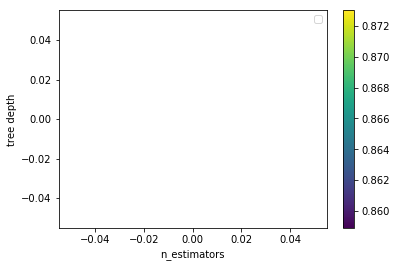

In [133]:
from sklearn.model_selection import GridSearchCV

# initialize search space (as a library!)
param_grid = {
    'n_estimators': range(10,40),'max_depth':range(10,20)
}

# Instantiate random forest. You can specify default parameters here.
# These parameters are not being optimized.
rf = RandomForestClassifier(min_samples_leaf=2)

# initialize grid search
gs = GridSearchCV(rf, param_grid,  n_jobs=-2)#,scoring='roc_auc')

gs.fit(X_train, y_train)

res = gs.cv_results_
n_est = [p['n_estimators'] for p in res['params']]
tree_depth = [p['max_depth'] for p in res['params']]



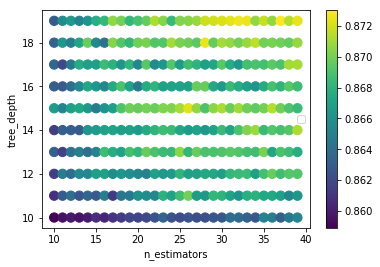

In [138]:
test_acc = res['mean_test_score']
train_acc = res['mean_train_score']
plt.scatter(n_est, tree_depth,c=test_acc,s=test_acc*100)
# plt.plot(n_est, train_acc, label='train score')  # activate to also show training score
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('tree_depth');
plt.colorbar()

### Creating predictions from grid search
- as mentioned above, the `GridSearchCV` class has the same interface as a "normal" classifier
- so we can call `predict()` to generate predictions, using the model with the best test score:

In [98]:
preds = gs.predict(X_test)
preds[:5]

array([0, 1, 1, 0, 0])

In [99]:
metrics.accuracy_score(y_test, preds)

0.8784451170941533

## Exercise: parameter optimization
1. optimize depth of trees in addition to number of estimators
1. create a scatter plot with maximum depth and number of estimators on the axes, and the test score as color
1. optimize AUC instead of accuracy. Hint: you need to use the `scoring` parameter, see [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
1. bonus: find model that optimizes TPR at FPR=0.05. Hint: you need to implement a custom scoring function and pass it as `scoring` parameter. Signature: `scorer(estimator, X, y)`. (this is quite hard, so maybe it's even a super-bonus exercise ;)

See [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) for information on `scoring` parameter.

For metric names see [sklearn.metrics](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics). To use it, omit the `_score` suffix when supplying function name to `scoring` parameter, e.g., `scoring='accuracy'`.

In [49]:
# your code here...

In [50]:
#
# Solution below
#
#
#
#
# 
#             ###
#             ###
#             ###
#           #######
#            #####
#             ###
#              #
# 
#
#             ###
#             ###
#             ###
#           #######
#            #####
#             ###
#              #
# 
#
#             ###
#             ###
#             ###
#           #######
#            #####
#             ###
#              #
# 
#
#             ###
#             ###
#             ###
#           #######
#            #####
#             ###
#              #
# 
#
#
#
#
#
#
#
#
#

In [51]:
# GridSearchCV with AUC
param_grid = {'n_estimators': [5, 10, 25, 50],
              'max_depth': [1, 3, 5, 7]
             }
gs = GridSearchCV(rf, param_grid, scoring='roc_auc', verbose=2)

# fit the grid search. Will try all parameters and deliver the best ones.
# See GridSearch has the same interface as a "normal" model?
gs.fit(X_train, y_train)
print('best parameters: %s'%gs.best_params_)
print('best score: %.2f'%gs.best_score_)
pprint(gs.cv_results_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] max_depth=1, n_estimators=5 .....................................
[CV] ...................... max_depth=1, n_estimators=5, total=   0.0s
[CV] max_depth=1, n_estimators=5 .....................................
[CV] ...................... max_depth=1, n_estimators=5, total=   0.0s
[CV] max_depth=1, n_estimators=5 .....................................
[CV] ...................... max_depth=1, n_estimators=5, total=   0.0s
[CV] max_depth=1, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... max_depth=1, n_estimators=10, total=   0.0s
[CV] max_depth=1, n_estimators=10 ....................................
[CV] ..................... max_depth=1, n_estimators=10, total=   0.0s
[CV] max_depth=1, n_estimators=10 ....................................
[CV] ..................... max_depth=1, n_estimators=10, total=   0.0s
[CV] max_depth=1, n_estimators=25 ....................................
[CV] ..................... max_depth=1, n_estimators=25, total=   0.0s
[CV] max_depth=1, n_estimators=25 ....................................
[CV] ..................... max_depth=1, n_estimators=25, total=   0.0s
[CV] max_depth=1, n_estimators=25 ....................................
[CV] ..................... max_depth=1, n_estimators=25, total=   0.1s
[CV] max_depth=1, n_estimators=50 ....................................
[CV] ..................... max_depth=1, n_estimators=50, total=   0.1s
[CV] max_depth=1, n_estimators=50 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   14.6s finished


best parameters: {'max_depth': 7, 'n_estimators': 50}
best score: 0.91
{'mean_fit_time': array([0.03322522, 0.05739498, 0.11932755, 0.23620613, 0.05278142,
       0.09741211, 0.20868063, 0.42945115, 0.06602295, 0.12599087,
       0.327564  , 0.66579636, 0.1147542 , 0.23008784, 0.58775433,
       0.84998965]),
 'mean_score_time': array([0.00536354, 0.00769901, 0.01291434, 0.02480714, 0.00602897,
       0.01072693, 0.01450149, 0.01927018, 0.01143877, 0.00234087,
       0.00702222, 0.03877203, 0.00769035, 0.01839717, 0.02551532,
       0.02804565]),
 'mean_test_score': array([0.78373051, 0.79736476, 0.80713191, 0.81979779, 0.85954359,
       0.86946883, 0.87558404, 0.87699454, 0.88112741, 0.88812193,
       0.89536694, 0.89683328, 0.89895584, 0.90066901, 0.91052661,
       0.9119093 ]),
 'mean_train_score': array([0.79081768, 0.80498475, 0.81018393, 0.82309412, 0.86503797,
       0.87752868, 0.88249278, 0.88322243, 0.89533287, 0.90005869,
       0.90637041, 0.90858771, 0.91974818, 0.92615

C:\Users\mariu_rbqe9ax\Anaconda3\envs\training_dm1\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


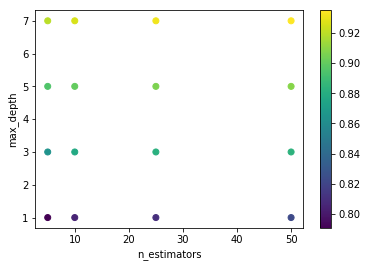

In [52]:
# scatter plot
res = gs.cv_results_
nest = [p['n_estimators'] for p in res['params']]
mdep = [p['max_depth'] for p in res['params']]
test_score = res['mean_test_score']
train_score = res['mean_train_score']
plt.scatter(nest, mdep, c=train_score)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar();

In [53]:
# GridSearchCV with AUC and custom threshold
param_grid = {'n_estimators': [5, 10, 25, 50],
              'max_depth': [1, 3, 5, 7]
             }
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, scoring='roc_auc', verbose=2)

# fit the grid search. Will try all parameters and deliver the best ones.
# See GridSearch has the same interface as a "normal" model?
gs.fit(X_train, y_train)
print('best parameters: %s'%gs.best_params_)
print('best score: %.2f'%gs.best_score_)
pprint(gs.cv_results_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] max_depth=1, n_estimators=5 .....................................
[CV] ...................... max_depth=1, n_estimators=5, total=   0.0s
[CV] max_depth=1, n_estimators=5 .....................................
[CV] ...................... max_depth=1, n_estimators=5, total=   0.0s
[CV] max_depth=1, n_estimators=5 .....................................
[CV] ...................... max_depth=1, n_estimators=5, total=   0.0s
[CV] max_depth=1, n_estimators=10 ....................................
[CV] ..................... max_depth=1, n_estimators=10, total=   0.0s
[CV] max_depth=1, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... max_depth=1, n_estimators=10, total=   0.0s
[CV] max_depth=1, n_estimators=10 ....................................
[CV] ..................... max_depth=1, n_estimators=10, total=   0.0s
[CV] max_depth=1, n_estimators=25 ....................................
[CV] ..................... max_depth=1, n_estimators=25, total=   0.0s
[CV] max_depth=1, n_estimators=25 ....................................
[CV] ..................... max_depth=1, n_estimators=25, total=   0.0s
[CV] max_depth=1, n_estimators=25 ....................................
[CV] ..................... max_depth=1, n_estimators=25, total=   0.0s
[CV] max_depth=1, n_estimators=50 ....................................
[CV] ..................... max_depth=1, n_estimators=50, total=   0.1s
[CV] max_depth=1, n_estimators=50 ....................................
[CV] ..................... max_depth=1, n_estimators=50, total=   0.1s
[CV] max_depth=1, n_estimators=50 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   12.4s finished


best parameters: {'max_depth': 7, 'n_estimators': 50}
best score: 0.91
{'mean_fit_time': array([0.0246226 , 0.04557061, 0.11465033, 0.18995706, 0.04324977,
       0.08193008, 0.21364466, 0.41633344, 0.06195966, 0.12789655,
       0.31039381, 0.6243976 , 0.07888969, 0.1668872 , 0.3678697 ,
       0.76384322]),
 'mean_score_time': array([0.0040133 , 0.00735839, 0.01071159, 0.01878206, 0.00485174,
       0.00683991, 0.01272925, 0.02173217, 0.0050141 , 0.00836364,
       0.01362125, 0.02168028, 0.0055337 , 0.00919183, 0.01420657,
       0.0248936 ]),
 'mean_test_score': array([0.79605546, 0.7996235 , 0.80891639, 0.82203726, 0.85138601,
       0.86728587, 0.87492273, 0.87681077, 0.88527398, 0.89087019,
       0.89280452, 0.894737  , 0.89748483, 0.90169641, 0.90818018,
       0.91134875]),
 'mean_train_score': array([0.80287889, 0.80500933, 0.81156139, 0.8272428 , 0.86076011,
       0.87327798, 0.882091  , 0.88343632, 0.89775264, 0.90440398,
       0.90588429, 0.90780117, 0.92565564, 0.92696

### Solution of Bonus: GridSearchCV with custom scoring function 

This exercise combines everything you have learned so far.

The idea here is to specify a custom `scorer` function.

In this function you would apply the estimator to generate confidences with `estimator.predict_proba`. Then use the code from the ROC analysis exercise above to find the first threshold that reaches a given `target_fpr`.

Once we have that threshold, we apply it and compute the recall of the positive class (gamma).

On a high level, we search for the random forest parameters that deliver the highest recall of class gamma while guaranteeing a certain precision (= 1 - FPr).

Parameter optimization. Max FPR: 0.05 (equivalent min precision 0.95)
best parameters: {'n_estimators': 50}
best score: 0.48


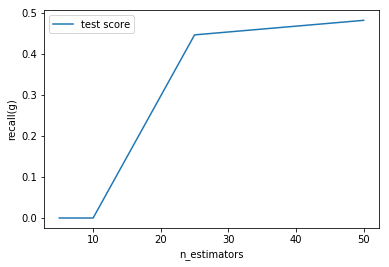

In [139]:
target_fpr = 0.05

def scorer(estimator, X, y):
    confidences = estimator.predict_proba(X)
    # Extract confidences as lists:
    conf_h, conf_g = zip(*confidences)

    # Use roc_curve() to extract false positive rate, true positive rate and the corresponding thresholds:
    fpr, tpr, thresholds = metrics.roc_curve(y, conf_g, pos_label=1)
    df = pd.DataFrame([tpr, fpr, thresholds]).transpose()
    df.columns = ['tpr', 'fpr', 'thr']
    threshold = df[df.fpr <= target_fpr].thr.iloc[-1]
    y_pred_thr = list(map(lambda c: 1 if c > threshold else 0, conf_g))
    
    return metrics.recall_score(y, y_pred_thr, pos_label=1)


param_grid = {
    'n_estimators': [5, 10, 25, 50]
}
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, scoring=scorer)

# fit the grid search. Will try all parameters and deliver the best ones.
# See GridSearch has the same interface as a "normal" model?
gs.fit(X_train, y_train)
print('Parameter optimization. Max FPR: %.2f (equivalent min precision %.2f)'%(target_fpr, 1-target_fpr))
print('best parameters: %s'%gs.best_params_)
print('best score: %.2f'%gs.best_score_)

res = gs.cv_results_
xax = [p['n_estimators'] for p in res['params']]
test_acc = res['mean_test_score']
train_acc = res['mean_train_score']
plt.plot(xax, test_acc, label='test score')
# plt.plot(xax, train_acc, label='train score')  # activate to also show training score
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('recall(g)');

You can see that for simple models (with only a few estimators), it is apparently impossible to reach the desired precision.

# Another model: k-NN, and an introduction to Pipelines
- important parameters:
  - metric
  - weights
      - default: euclidean distance
      - other options: cosine similarity, dynamic timewarp distance, ...
- challenge: needs normalization of data

### Standard Scaler
- The StandardScaler normalizes each column in the data by shifting and scaling such that each column has mean 0 and standard deviation 1.
- Implementation: [sklearn.preprocessing.StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

### Transformers
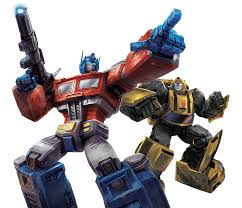

The StandardScaler is an example for a *transformer* in sklearn.

- Similar to predictors, they have a `fit()` function that learns the transformation parameters. For the StandardScaler, this are mean and standard deviation of every column.
- To actually perform the transformation, the `transform()` function is used
- The `fit_transform()` function is a shortcut for first calling `fit()` and then `transform()` on the data.

A little inconvenience is that `transform()` returns a numpy matrix instead of a pandas DataFrame. This means that the column names are lost.

In [143]:
from sklearn.preprocessing import StandardScaler

# StandardScaler normalizes each column in the data by shifting and scaling 
# such that each column has mean 0 and standard deviation 1.
ss = StandardScaler()

# use fit_transform to normalize the data
X_std = ss.fit_transform(X)
pd.DataFrame(X_std).describe()

,0,1,2,3,4,5,6,7,8,9
count,1.901900e+04,1.901900e+04,1.901900e+04,1.901900e+04,1.901900e+04,1.901900e+04,1.901900e+04,1.901900e+04,1.901900e+04,1.901900e+04
mean,3.586524e-17,4.184278e-17,4.273941e-16,3.511805e-17,3.037338e-16,-5.977540e-18,1.793262e-17,4.856751e-18,1.912813e-16,-2.151914e-16
std,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00
min,-1.155872e+00,-1.209053e+00,-1.869937e+00,-2.008753e+00,-1.939703e+00,-7.661144e+00,-6.712247e+00,-9.897797e+00,-1.059057e+00,-2.576583e+00
25%,-6.825396e-01,-5.623891e-01,-7.362013e-01,-7.905694e-01,-7.800871e-01,-2.745495e-01,-4.586268e-01,-5.329493e-01,-8.465582e-01,-6.868287e-01
50%,-3.800929e-01,-2.747569e-01,-1.807596e-01,-1.434605e-01,-1.643098e-01,1.409551e-01,9.342065e-02,2.110829e-02,-3.818670e-01,-2.632251e-02
75%,3.983386e-01,1.394668e-01,5.852209e-01,6.748614e-01,6.387796e-01,4.795792e-01,4.960614e-01,5.135978e-01,6.987213e-01,6.254821e-01
max,6.631157e+00,1.276576e+01,5.286268e+00,2.804358e+00,4.167396e+00,9.789176e+00,4.466193e+00,8.623317e+00,2.388761e+00,4.037839e+00


In [144]:
# we can also use two lines:
ss.fit(X)
x_std = ss.transform(X)
pd.DataFrame(X_std).describe()

,0,1,2,3,4,5,6,7,8,9
count,1.901900e+04,1.901900e+04,1.901900e+04,1.901900e+04,1.901900e+04,1.901900e+04,1.901900e+04,1.901900e+04,1.901900e+04,1.901900e+04
mean,3.586524e-17,4.184278e-17,4.273941e-16,3.511805e-17,3.037338e-16,-5.977540e-18,1.793262e-17,4.856751e-18,1.912813e-16,-2.151914e-16
std,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00
min,-1.155872e+00,-1.209053e+00,-1.869937e+00,-2.008753e+00,-1.939703e+00,-7.661144e+00,-6.712247e+00,-9.897797e+00,-1.059057e+00,-2.576583e+00
25%,-6.825396e-01,-5.623891e-01,-7.362013e-01,-7.905694e-01,-7.800871e-01,-2.745495e-01,-4.586268e-01,-5.329493e-01,-8.465582e-01,-6.868287e-01
50%,-3.800929e-01,-2.747569e-01,-1.807596e-01,-1.434605e-01,-1.643098e-01,1.409551e-01,9.342065e-02,2.110829e-02,-3.818670e-01,-2.632251e-02
75%,3.983386e-01,1.394668e-01,5.852209e-01,6.748614e-01,6.387796e-01,4.795792e-01,4.960614e-01,5.135978e-01,6.987213e-01,6.254821e-01
max,6.631157e+00,1.276576e+01,5.286268e+00,2.804358e+00,4.167396e+00,9.789176e+00,4.466193e+00,8.623317e+00,2.388761e+00,4.037839e+00


Shouldn't the mean be zero after scaling? What do you think?

## Information Leaks in Split Validation
- in split validation (and also cross validation (later)) we need to be super careful about data/information leaking from test data into training data
- normalization uses whole data set to calculate scaling parameters
    => effectively leaking information from test into training
- solution: place calculation of standardization factors into training part
- best practice: use pipelines

## Meet the Pipeline
- [Pipelines in sklearn](http://scikit-learn.org/stable/modules/pipeline.html)
- "chain" several objects that implement the `transformer` interface, i.e.:
    - `fit(X, y)` function
    - `transform(X)` function
    - last element in chain may be a predictor, so instead of `transform` may implement `predict(X)` function instead

In [145]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# initialize normalizer
ss = StandardScaler()

# initialize knn classifier
knn = KNeighborsClassifier()

# create pipeline that first normalizes the data and then learns or applies a knn model:
pipeline = make_pipeline(ss, knn)
pipeline

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))])

In [147]:
# pipeline itself again implements fit and predict -- just like any classifier.
pipeline.fit(X, y)
pipeline.predict(X)

array([1, 0, 1, ..., 0, 0, 0])

In [148]:
# Validate kNN without/with correct normalization

# without:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('No normalization: ', metrics.roc_auc_score(y_test, y_pred))

# correct normalization:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print('Correct normalization: ', metrics.roc_auc_score(y_test, y_pred))


('No normalization: ', 0.7608883505575849)
('Correct normalization: ', 0.7969963785097449)


# Cross Validation
- Split validation: error estimation depends a lot on the split
  - you might have all the "easy" examples in testing and overestimate your model
- better: cross validation
  - split data into k partitions
  - train k models on k-1 parts of the data, test on the k-th
  - return average performance of the k folds
- in sklearn: [sklearn.cross_validation](http://scikit-learn.org/stable/modules/cross_validation.html), especially [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
- normally uses classifier's score method (i.e., accuracy for classification)
- can be overriden with scoring parameter (see below)
- cross validation supports pipelines

In [151]:
# usage:
from sklearn.model_selection import cross_val_score

clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))

score = cross_val_score(clf, X, y, cv=10)
print('Accuracies: ', score)
print(score.mean(), score.std())

('Accuracies: ', array([0.84025223, 0.84279706, 0.83964248, 0.84805468, 0.83596215,
       0.85068349, 0.82071504, 0.83648791, 0.84797475, 0.84218832]))
(0.8404758102438882, 0.008085172303155936)


`cross_val_score` also accepts a scoring parameter, similar to the `GridSearchCV`:

In [152]:
# AUC scorer

# supply AUC as scoring parameter:
score = cross_val_score(clf, X, y, scoring='roc_auc', cv=3)

print('AUC scores: ', score)
print(score.mean(), score.std())

('AUC scores: ', array([0.87479594, 0.86973832, 0.87499915]))
(0.8731778038208602, 0.002433496915127459)


# Model persistence with `pickle`

Often, training a model takes quite a while (minutes, hours, even days sometimes). So wouldn't it be good if we could store it for later use?

- to reproduce your results
- to generate predictions on new (production) data
- ...

Pickle is your friend!
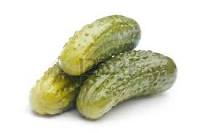

The `pickle()` function allows you to store models (actually *any* Python object in a binary file on disk.

Later you can load from the file and get and exact copy of your object.

This, by the way, is also useful to store data after preprocessing. Often when you read from CSV, you need to specify the separator, convert date strings to date objects etc. This is not necessary if you read the data from a pickle file.

But, back to model persistence. Here is how it works:

In [154]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Now pickle the tree...

In [155]:
import pickle
with open('../results/magic_decisiontree.pkl', 'wb') as f:
    pickle.dump(dtree, f)

IOError: [Errno 2] No such file or directory: '../results/magic_decisiontree.pkl'

And read it back in:

In [64]:
import pickle
with open('../results/magic_decisiontree.pkl', 'rb') as f:
    unpickled_tree = pickle.load(f)
unpickled_tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

You can use it now to generate predictions:

In [65]:
unpickled_tree.predict(X_test)

array([0, 1, 1, ..., 1, 0, 0])

### Pickling data

For pandas DataFrames it is even easier to pickle and unpickle them. Pandas offers some nice convenience functions. The index and all data types etc remain intact -- it's a 1-to-1 copy.

In [66]:
data.head(5)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,g


In [67]:
# Pickle the data
data.to_pickle('../data/pickled_data.pkl')

In [68]:
# Unpickle the data
unpickled_data = pd.read_pickle('../data/pickled_data.pkl')
unpickled_data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,g


## cloudpickle

In some cases pickle cannot serialize an object, e.g., when the object contains lambda functions.

In most such cases, [cloudpickle](https://github.com/cloudpipe/cloudpickle) is able to pickle it.

# More Topics for Home Study
- regression problems (see notebook "How to find Pi")
- missing values
  - filter (horizontal/vertical)
  - replace avg
  - impute
- useful packages:
  - H2O
- model overview + parameters to optimize
- learning curve
- feature importances
- feature selection
- explaining predictions with Lime
- apply model on new data
- other common preprocessing steps
  - joins
  - aggregations
  - pivot
  - dummy coding
- multi-label classification

# Coming soon... (Data Mining 2):
- Unsupervised learning: Clustering and Outlier Detection